In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [11]:
# Reading preliminaryDataset: "1980-2014 Election Data.csv" file from Github
df = pd.read_csv("https://raw.githubusercontent.com/mmingoia/HTML_MN_Group_Project/main/Data/Turnout%20Data/1980-2014%20Election%20Data.csv")

df

,Year,ICPSR State Code,Alphanumeric State Code,StateName,VEP Total Ballots Counted,VEP Highest Office,VAP Highest Office,Total Ballots Counted,Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible
0,2014,0,0,United States,0.367,0.360,0.332,83262122.0,81687059.0,227157964,245712915,0.084,1493706,2298993,548576,3329718,5345814.0
1,2014,41,1,Alabama,0.332,0.329,0.315,1191274.0,1180413.0,3588783,3751844,0.025,31691,53640,8097,69826,NaN
2,2014,81,2,Alaska,0.548,0.542,0.510,285431.0,282382.0,520562,553473,0.039,5216,7077,2210,11389,NaN
3,2014,61,3,Arizona,0.341,0.334,0.295,1537671.0,1506416.0,4510186,5110890,0.101,37516,73232,7502,86028,NaN
4,2014,42,4,Arkansas,0.403,0.401,0.375,852642.0,848592.0,2117881,2263040,0.040,17756,28192,21743,55287,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,1980,40,47,Virginia,NaN,0.487,0.475,NaN,1866032.0,3830887,3927383,0.020,8920,11463,4783,19435,NaN
932,1980,73,48,Washington,0.606,0.596,0.574,1772904.0,1742394.0,2923670,3037193,0.029,4399,12527,14669,25332,NaN
933,1980,56,49,West Virginia,0.535,0.532,0.528,742150.0,737715.0,1387231,1396595,0.005,1257,2650,475,3057,NaN
934,1980,25,50,Wisconsin,NaN,0.684,0.674,NaN,2273221.0,3322053,3371087,0.010,3980,19088,2639,16163,NaN


In [12]:
# Create new dataset for simple linear regression
new_df = df.copy


In [13]:
# Replace NaN with 0
new_df = df.replace(np.nan,0)
new_df

,Year,ICPSR State Code,Alphanumeric State Code,StateName,VEP Total Ballots Counted,VEP Highest Office,VAP Highest Office,Total Ballots Counted,Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible
0,2014,0,0,United States,0.367,0.360,0.332,83262122.0,81687059.0,227157964,245712915,0.084,1493706,2298993,548576,3329718,5345814.0
1,2014,41,1,Alabama,0.332,0.329,0.315,1191274.0,1180413.0,3588783,3751844,0.025,31691,53640,8097,69826,0.0
2,2014,81,2,Alaska,0.548,0.542,0.510,285431.0,282382.0,520562,553473,0.039,5216,7077,2210,11389,0.0
3,2014,61,3,Arizona,0.341,0.334,0.295,1537671.0,1506416.0,4510186,5110890,0.101,37516,73232,7502,86028,0.0
4,2014,42,4,Arkansas,0.403,0.401,0.375,852642.0,848592.0,2117881,2263040,0.040,17756,28192,21743,55287,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,1980,40,47,Virginia,0.000,0.487,0.475,0.0,1866032.0,3830887,3927383,0.020,8920,11463,4783,19435,0.0
932,1980,73,48,Washington,0.606,0.596,0.574,1772904.0,1742394.0,2923670,3037193,0.029,4399,12527,14669,25332,0.0
933,1980,56,49,West Virginia,0.535,0.532,0.528,742150.0,737715.0,1387231,1396595,0.005,1257,2650,475,3057,0.0
934,1980,25,50,Wisconsin,0.000,0.684,0.674,0.0,2273221.0,3322053,3371087,0.010,3980,19088,2639,16163,0.0


In [14]:
new_df.dtypes

Year                                  int64
ICPSR State Code                      int64
Alphanumeric State Code               int64
StateName                            object
VEP Total Ballots Counted           float64
VEP Highest Office                  float64
VAP Highest Office                  float64
Total Ballots Counted               float64
Highest Office                      float64
Voting-Eligible Population (VEP)      int64
Voting-Age Population (VAP)           int64
% Non-citizen                       float64
Prison                                int64
Probation                             int64
Parole                                int64
Total Ineligible Felon                int64
Overseas Eligible                   float64
dtype: object

In [11]:
# Drop first row, USA
# new_df = new_df.drop(clean_df.index[0])

In [17]:
#Drop unnecessary identifier columns
new_df.drop(['ICPSR State Code', 'Alphanumeric State Code'], axis=1, inplace=True)


In [18]:
new_df

,Year,StateName,VEP Total Ballots Counted,VEP Highest Office,VAP Highest Office,Total Ballots Counted,Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible
0,2014,United States,0.367,0.360,0.332,83262122.0,81687059.0,227157964,245712915,0.084,1493706,2298993,548576,3329718,5345814.0
1,2014,Alabama,0.332,0.329,0.315,1191274.0,1180413.0,3588783,3751844,0.025,31691,53640,8097,69826,0.0
2,2014,Alaska,0.548,0.542,0.510,285431.0,282382.0,520562,553473,0.039,5216,7077,2210,11389,0.0
3,2014,Arizona,0.341,0.334,0.295,1537671.0,1506416.0,4510186,5110890,0.101,37516,73232,7502,86028,0.0
4,2014,Arkansas,0.403,0.401,0.375,852642.0,848592.0,2117881,2263040,0.040,17756,28192,21743,55287,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,1980,Virginia,0.000,0.487,0.475,0.0,1866032.0,3830887,3927383,0.020,8920,11463,4783,19435,0.0
932,1980,Washington,0.606,0.596,0.574,1772904.0,1742394.0,2923670,3037193,0.029,4399,12527,14669,25332,0.0
933,1980,West Virginia,0.535,0.532,0.528,742150.0,737715.0,1387231,1396595,0.005,1257,2650,475,3057,0.0
934,1980,Wisconsin,0.000,0.684,0.674,0.0,2273221.0,3322053,3371087,0.010,3980,19088,2639,16163,0.0


In [17]:
# Save cleaned data
file_path = '../HTML_MN_Group_Project/TurnoutData/1980-2014_cleaned.csv'
clean_df.to_csv(file_path, index=False)

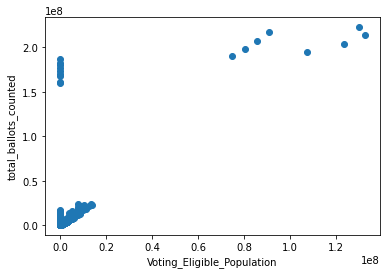

In [14]:
# Plot linear regression
plt.scatter(clean_df.total_ballots_counted, clean_df.Voting_Eligible_Population)
plt.xlabel('Voting_Eligible_Population')
plt.ylabel('total_ballots_counted')
plt.show()

In [18]:
# Reshape data
X = clean_df.Voting_Eligible_Population.values.reshape(-1,1)


In [20]:
X[:10]

array([[ 3588783],
       [  520562],
       [ 4510186],
       [ 2117881],
       [24440416],
       [ 3800664],
       [ 2577311],
       [  681526],
       [  495899],
       [13914216]])

In [21]:
X.shape

(935, 1)

In [22]:
y= clean_df.total_ballots_counted

In [24]:
#Create model
model = LinearRegression()

In [25]:
# Fit data into model
model.fit(X, y)

LinearRegression()

In [26]:
# Created predicted values from X values
y_pred = model.predict(X)
print(y_pred.shape)

(935,)


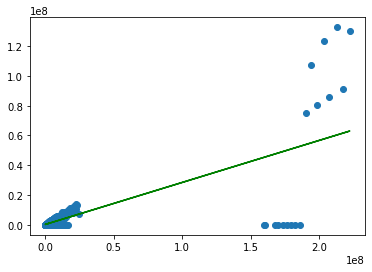

In [27]:
# Plot results and best fit line
plt.scatter(X,y)
plt.plot(X, y_pred, color='green')
plt.show()

In [28]:
# Print slope and y-intercept
print(model.coef_)
print(model.intercept_)

[0.28192011]
269883.9561502992


### Secondary dataset. Read in only. Linear regression model in election.ipynb file

In [15]:
# Read secondary dataset
df1 = pd.read_csv("https://ivote.s3.us-east-2.amazonaws.com/epi+indicators-all+years.csv")

df1

,state_abbv,state_fips,year,website_pollingplace,website_reg_status,website_precinct_ballot,website_absentee_status,website_provisional_status,reg_rej,prov_partic,...,post_election_audit,nonvoter_illness_onyear_pct,nonvoter_illness_offyear_pct,nonvoter_reg_onyear_pct,nonvoter_reg_offyear_pct,online_reg,wait,residual,pct_reg_of_vep_vrs,vep_turnout
0,AK,Alaska,2008,0,0,NaN,NaN,NaN,0.068102,0.062139,...,1.0,0.152142,NaN,0.052107,NaN,0,5.712700,0.003495,0.875693,0.682773
1,AK,Alaska,2010,1,1,0.0,1.0,0,0.082050,0.049773,...,1.0,NaN,0.093135,NaN,0.035279,0,NaN,NaN,0.835431,0.525560
2,AK,Alaska,2012,1,1,0.0,1.0,0,0.097063,0.060354,...,1.0,0.120155,NaN,0.063834,NaN,0,3.656872,0.003974,0.868472,0.591806
3,AK,Alaska,2014,1,1,0.0,1.0,0,0.086496,0.056739,...,1.0,NaN,0.093120,NaN,0.020184,0,4.156598,NaN,0.826949,0.543818
4,AL,Alabama,2008,0,0,NaN,NaN,NaN,0.000439,NaN,...,0.0,0.226150,NaN,0.075939,NaN,0,14.260800,NaN,0.852208,0.609528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,WV,West Virginia,2014,1,1,0.0,1.0,1,0.004942,0.006877,...,1.0,NaN,0.178077,NaN,0.034844,0,3.771747,NaN,0.756622,0.311667
200,WY,Wyoming,2008,1,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.128153,NaN,0.059821,NaN,0,5.620379,0.005349,0.782883,0.631045
201,WY,Wyoming,2010,1,0,0.0,0.0,0,NaN,NaN,...,1.0,NaN,0.133298,NaN,0.020943,0,NaN,NaN,0.725026,0.458080
202,WY,Wyoming,2012,1,0,0.0,0.0,0,NaN,NaN,...,1.0,0.115326,NaN,0.041794,NaN,0,4.516539,0.006542,0.746732,0.592977
